In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
df = pd.read_csv('Friskis1_team_data.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

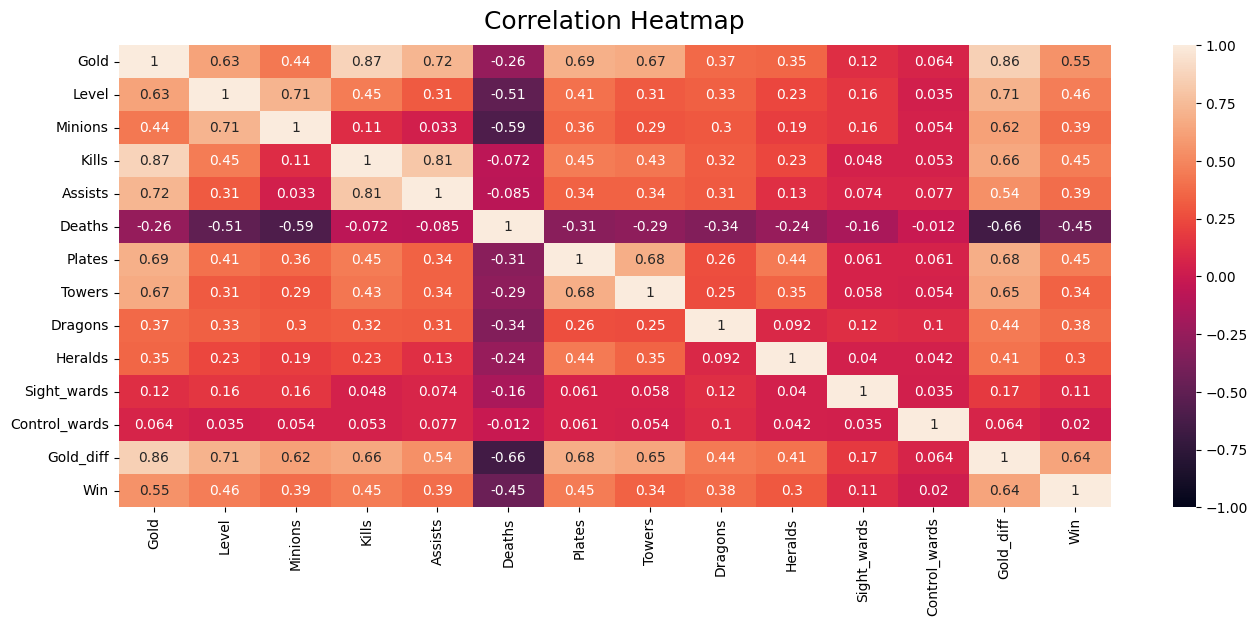

In [3]:
#Generate correlation matrix in orther to see most important values
corr = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

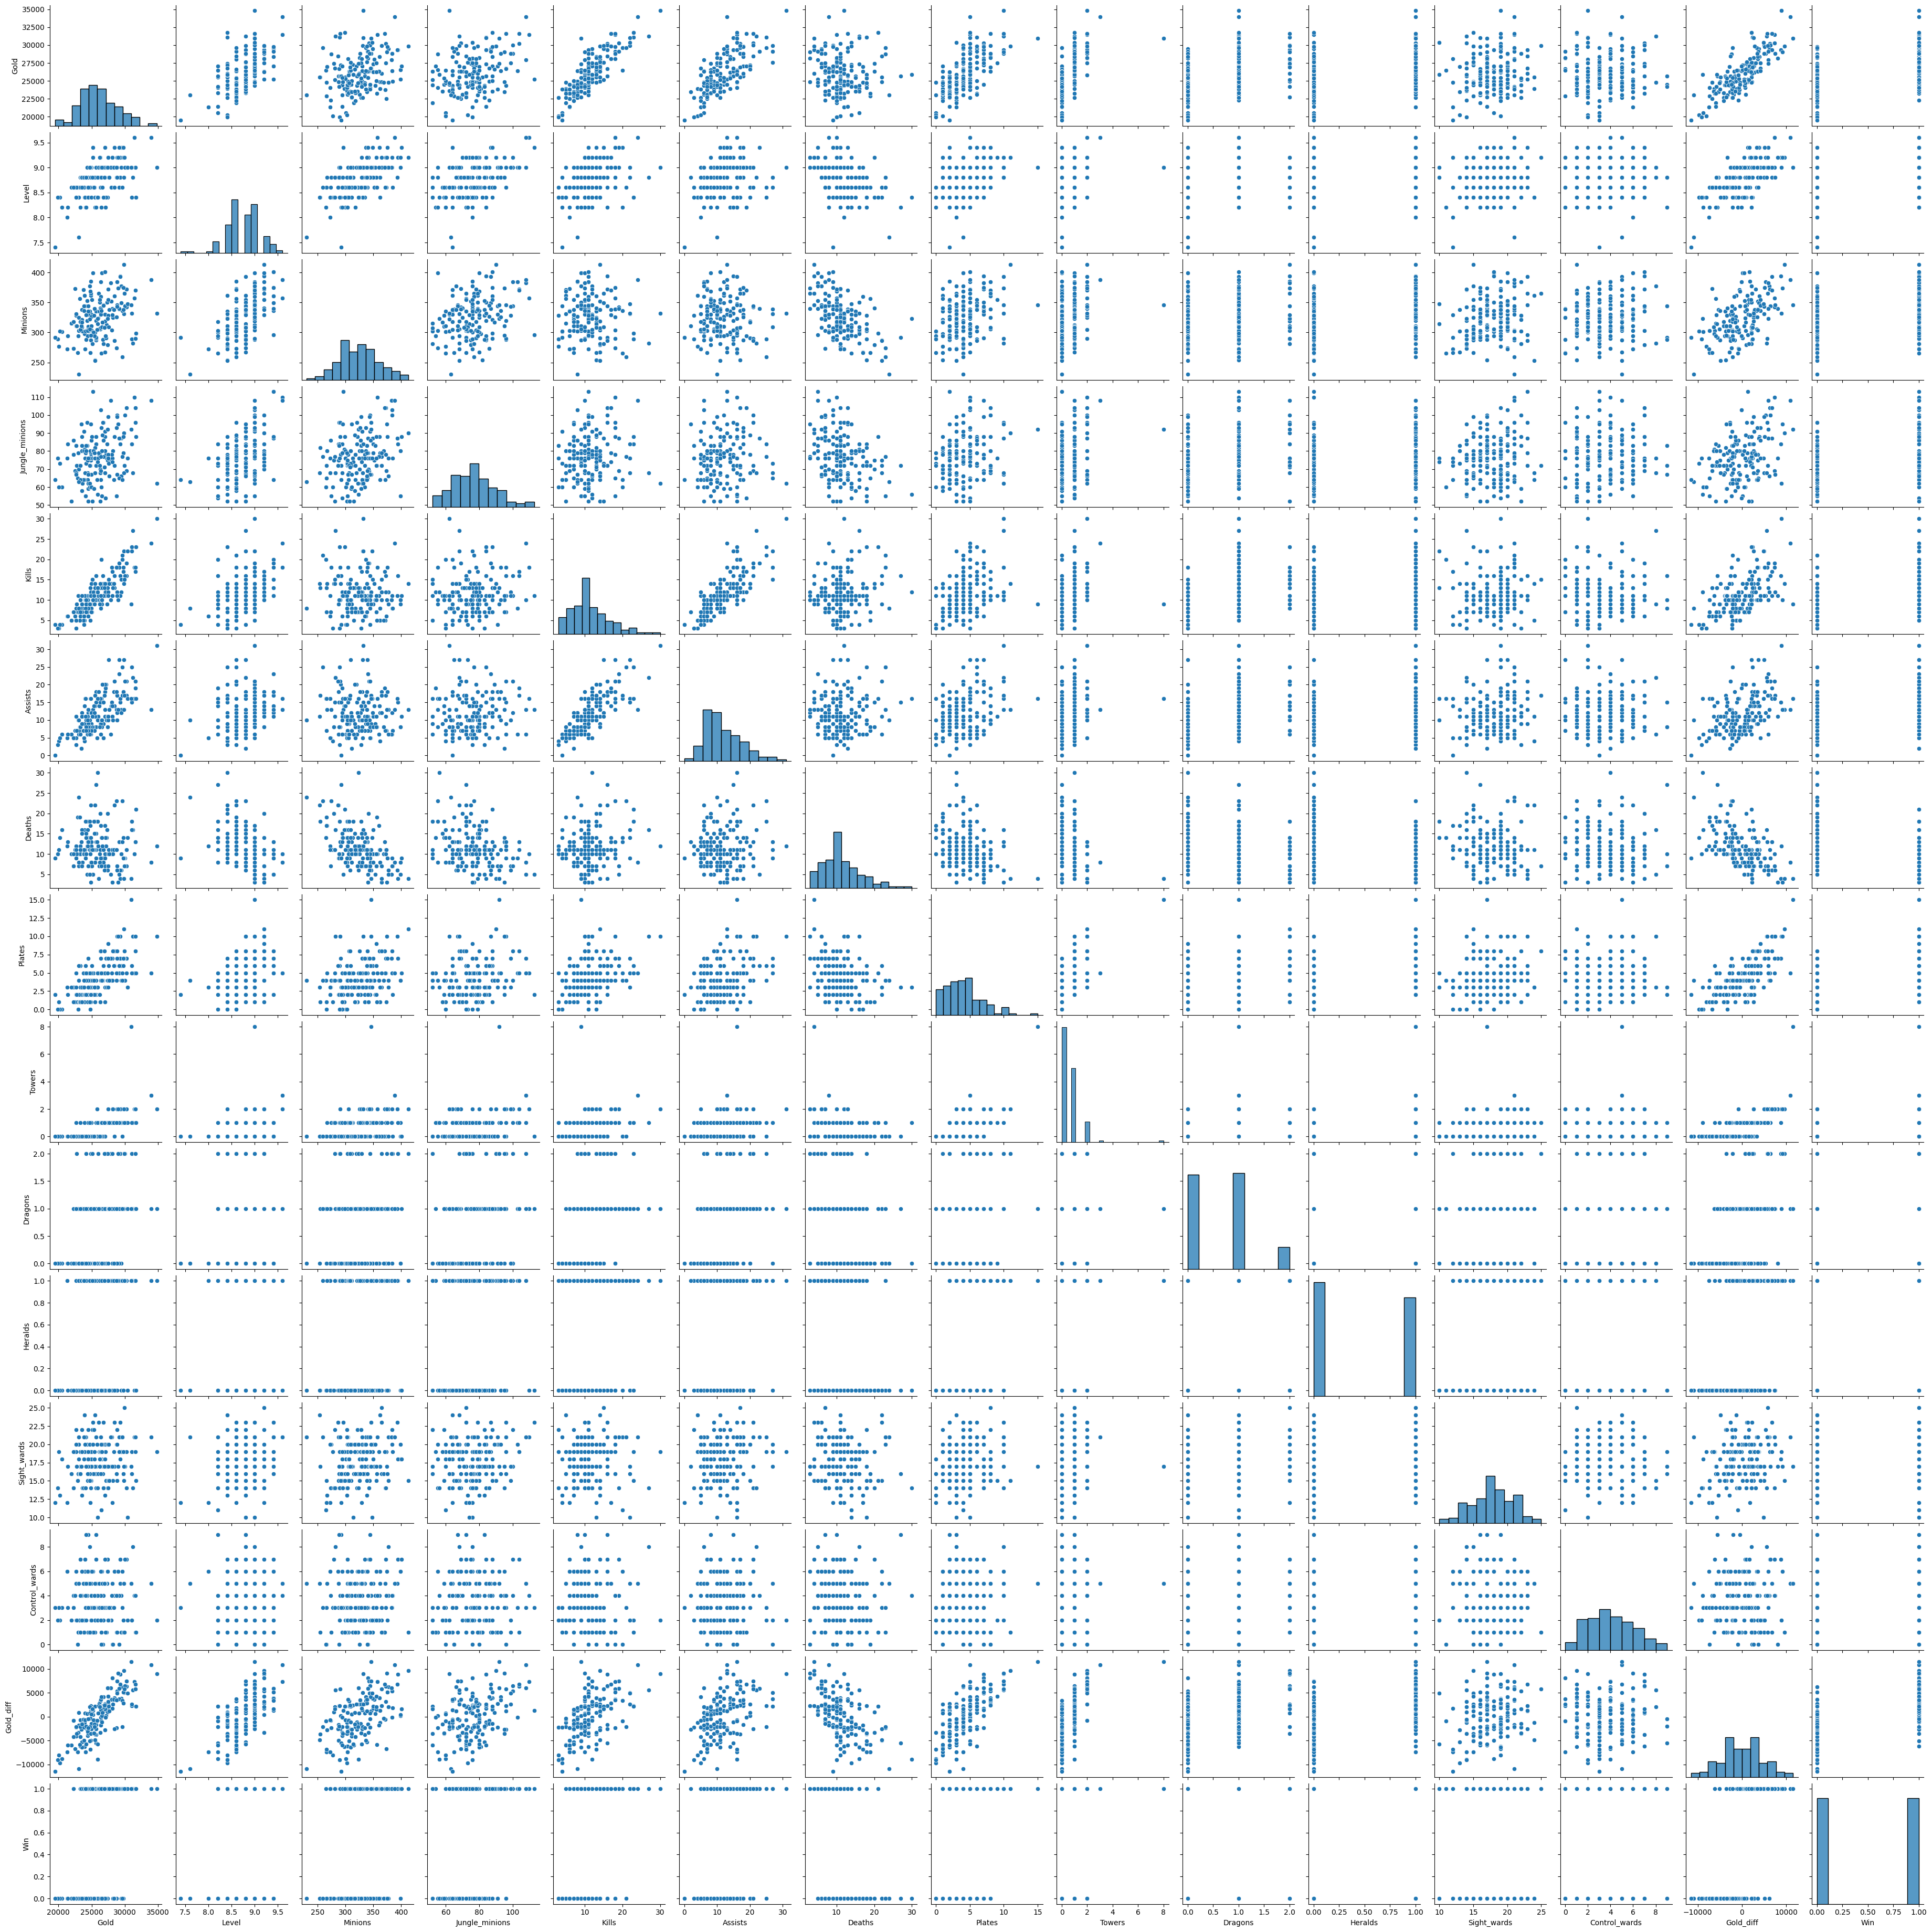

In [6]:
sns.pairplot(df)
plt.show()

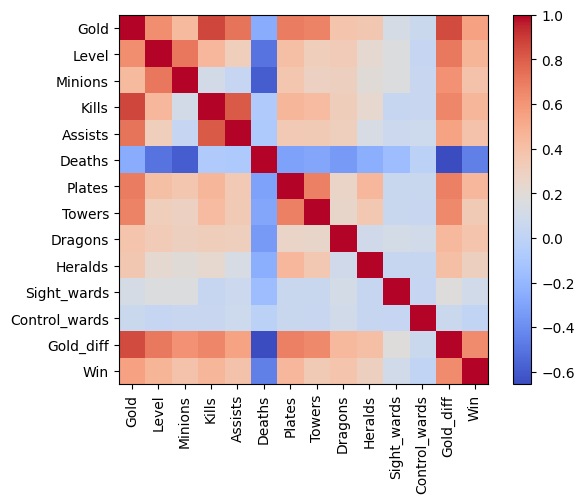

In [4]:
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

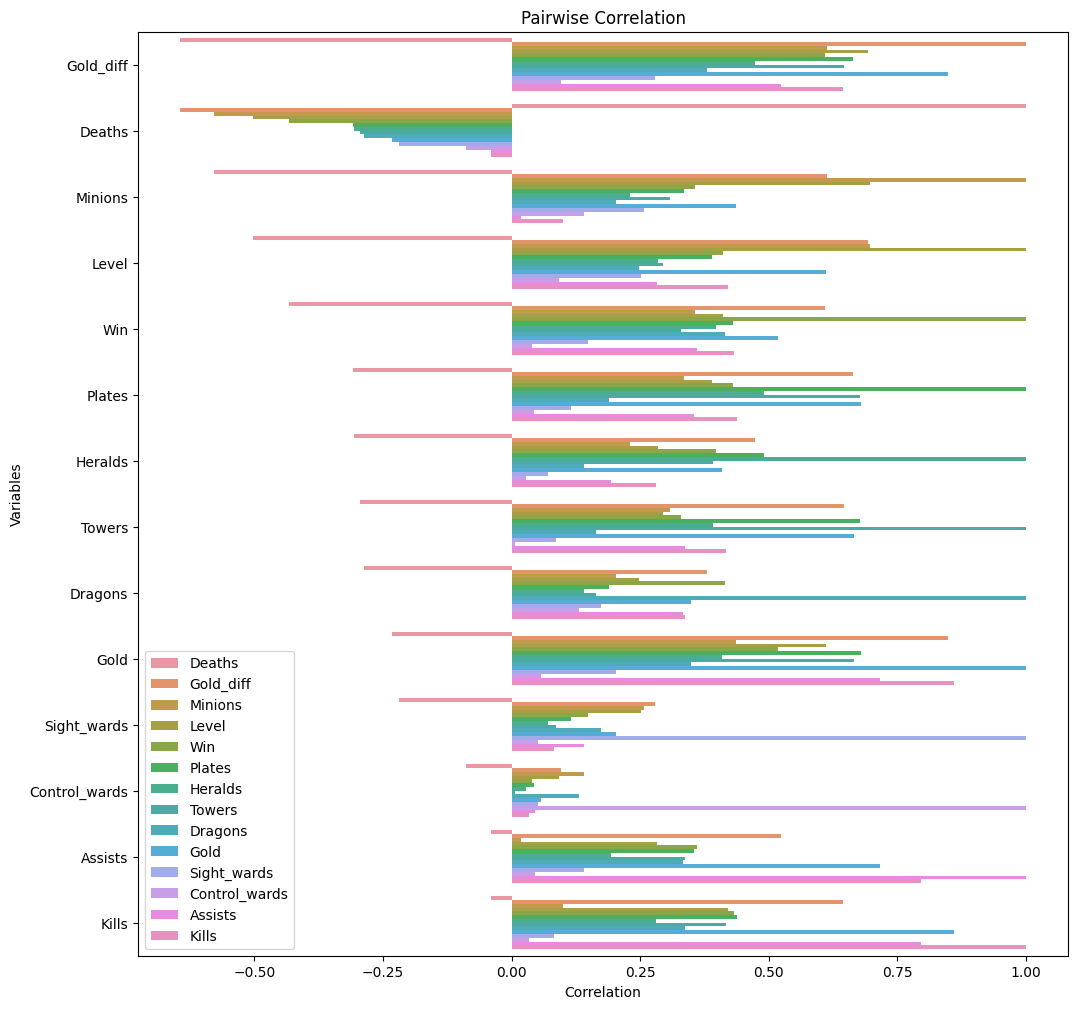

In [58]:
plt.figure(figsize=(12, 12))
sns.barplot(data=df.corr().unstack().sort_values().reset_index(), x=0, y='level_0', hue='level_1', orient='h')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title('Pairwise Correlation')
plt.legend()
plt.show()

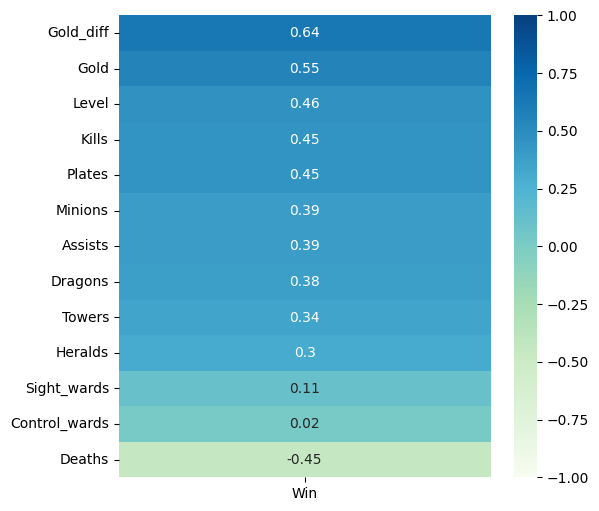

In [4]:
#Generate correlation matrix only of win column
fig, ax = plt.subplots(figsize=((6, 6)))
sns.heatmap(corr["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True,cmap="GnBu")
plt.show()

In [26]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores
    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    print(classification_report(y_train, y_hat_train, digits=digits))

    print("****CLASSIFICATION REPORT - TEST DATA****")
    print(classification_report(y_test, y_hat_test, digits=digits))

    print("****CONFUSION MATRIX****")
    fig, axes = plt.subplots(ncols=1, figsize=figsize)

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes)
    disp.ax_.set_title('Confusion Matrix')

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)

    return model


In [25]:
#We will first set the complete DataFrames
x_keep_original = ['Gold', 'Level', 'Minions', 'Kills', 'Assists', 'Deaths', 'Towers', 'Dragons', 'Heralds', 'Gold_diff']
X_original = df[x_keep_original]
y_original = df["Win"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.333333, random_state=42)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.8347    0.8208    0.8277       240
           1     0.8193    0.8333    0.8263       234

    accuracy                         0.8270       474
   macro avg     0.8270    0.8271    0.8270       474
weighted avg     0.8271    0.8270    0.8270       474

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7886    0.8362    0.8117       116
           1     0.8348    0.7869    0.8101       122

    accuracy                         0.8109       238
   macro avg     0.8117    0.8115    0.8109       238
weighted avg     0.8123    0.8109    0.8109       238

****CONFUSION MATRIX****


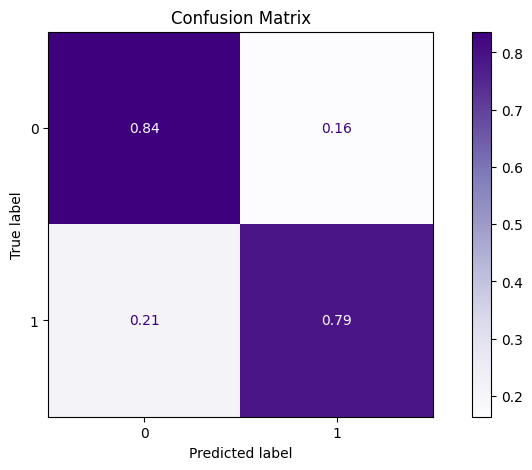

In [28]:
#Logistic regression using the original df
log_select = fit_eval(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

In [29]:
team_1 = {'Gold': 41300,
 'Level': 11.6,
 'Minions': 600,
 'Kills': 29,
 'Assists': 25,
 'Deaths': 26,
 'Towers': 0,
 'Dragons': 0,
 'Heralds': 0,
 'Gold_diff': 4184}

team_2= {'Gold': 37116,
 'Level': 11.6,
 'Minions': 530,
 'Kills': 26,
 'Assists': 26,
 'Deaths': 29,
 'Towers': 0,
 'Dragons': 0,
 'Heralds': 0,
 'Gold_diff': -4184}

In [30]:
import pandas as pd

# Create a DataFrame from the dictionary
team_1_df = pd.DataFrame(team_1, index=[0])

# Select the same features as used in training
team_1_features = team_1_df[x_keep_original]

# Make the prediction using the trained model
team1_prediction = log_select.predict(team_1_features)

# Make the prediction probabilities using the trained model
team1_prediction_probabilities = log_select.predict_proba(team_1_features)

# Get the probability of the positive class (win)
team1_win_probability = team1_prediction_probabilities[0][1]

# Display the prediction result and confidence
if team1_prediction[0] == 1:
    print("The team is predicted to win with a confidence of {:.2%}.".format(team1_win_probability))
else:
    print("The team is predicted to lose with a confidence of {:.2%}.".format(1 - team1_win_probability))
    
    
# Create a DataFrame from the dictionary
team_2_df = pd.DataFrame(team_2, index=[0])

# Select the same features as used in training
team_2_features = team_2_df[x_keep_original]

# Make the prediction using the trained model
team2_prediction = log_select.predict(team_2_features)

# Make the prediction probabilities using the trained model
team2_prediction_probabilities = log_select.predict_proba(team_2_features)

# Get the probability of the positive class (win)
team2_win_probability = team2_prediction_probabilities[0][1]

# Display the prediction result and confidence
if team2_prediction[0] == 1:
    print("The team is predicted to win with a confidence of {:.2%}.".format(team2_prediction_probabilities))
else:
    print("The team is predicted to lose with a confidence of {:.2%}.".format(1 - team2_win_probability))


The team is predicted to win with a confidence of 88.03%.
The team is predicted to lose with a confidence of 89.70%.


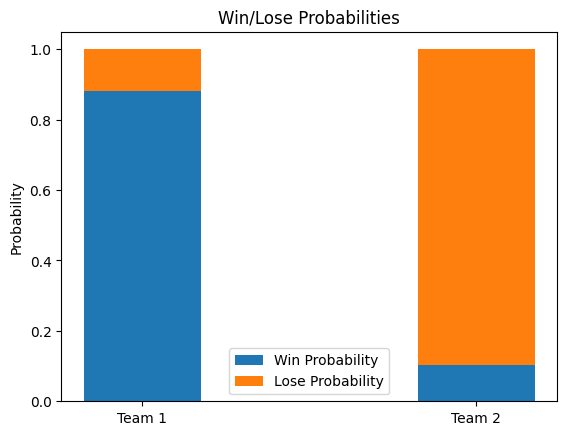

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate lose probabilities
team1_lose_probability = 1 - team1_win_probability
team2_lose_probability = 1 - team2_win_probability

# Define labels and data
labels = ["Team 1", "Team 2"]
win_probabilities = [team1_win_probability, team2_win_probability]
lose_probabilities = [team1_lose_probability, team2_lose_probability]

# Create the bar chart
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x, win_probabilities, width, label="Win Probability")
ax.bar(x, lose_probabilities, width, bottom=win_probabilities, label="Lose Probability")

# Customize the plot
ax.set_ylabel("Probability")
ax.set_title("Win/Lose Probabilities")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()


****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       240
           1     1.0000    1.0000    1.0000       234

    accuracy                         1.0000       474
   macro avg     1.0000    1.0000    1.0000       474
weighted avg     1.0000    1.0000    1.0000       474

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6667    0.7069    0.6862       116
           1     0.7043    0.6639    0.6835       122

    accuracy                         0.6849       238
   macro avg     0.6855    0.6854    0.6849       238
weighted avg     0.6860    0.6849    0.6848       238

****CONFUSION MATRIX****


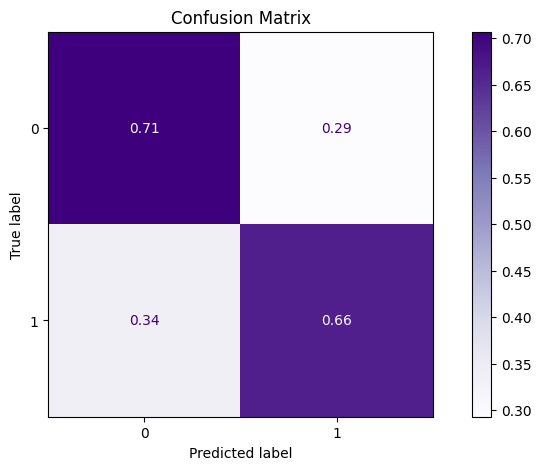

In [13]:
#Decision Tree using the original df
log_select = fit_eval(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       240
           1     1.0000    1.0000    1.0000       234

    accuracy                         1.0000       474
   macro avg     1.0000    1.0000    1.0000       474
weighted avg     1.0000    1.0000    1.0000       474

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7302    0.7931    0.7603       116
           1     0.7857    0.7213    0.7521       122

    accuracy                         0.7563       238
   macro avg     0.7579    0.7572    0.7562       238
weighted avg     0.7586    0.7563    0.7561       238

****CONFUSION MATRIX****


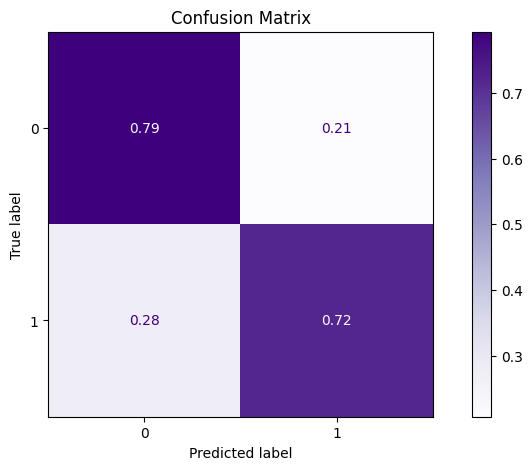

In [11]:
#Random Forest using the original df
log_select = fit_eval(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.7886    0.8362    0.8117       116
           1     0.8348    0.7869    0.8101       122

    accuracy                         0.8109       238
   macro avg     0.8117    0.8115    0.8109       238
weighted avg     0.8123    0.8109    0.8109       238



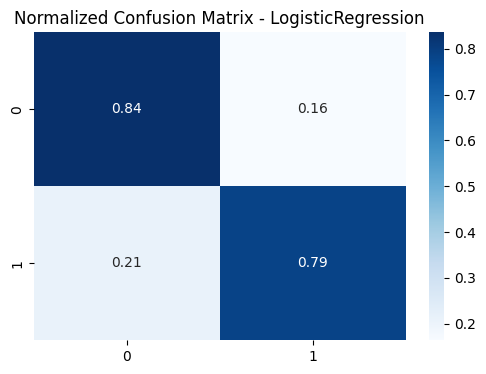

Classification Report:
              precision    recall  f1-score   support

           0     0.6720    0.7241    0.6971       116
           1     0.7168    0.6639    0.6894       122

    accuracy                         0.6933       238
   macro avg     0.6944    0.6940    0.6932       238
weighted avg     0.6950    0.6933    0.6931       238



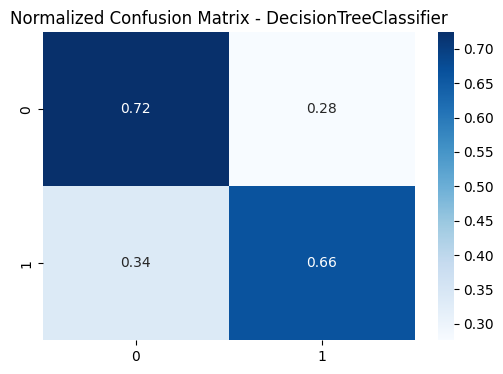

Classification Report:
              precision    recall  f1-score   support

           0    0.73438   0.81034   0.77049       116
           1    0.80000   0.72131   0.75862       122

    accuracy                        0.76471       238
   macro avg    0.76719   0.76583   0.76456       238
weighted avg    0.76801   0.76471   0.76441       238



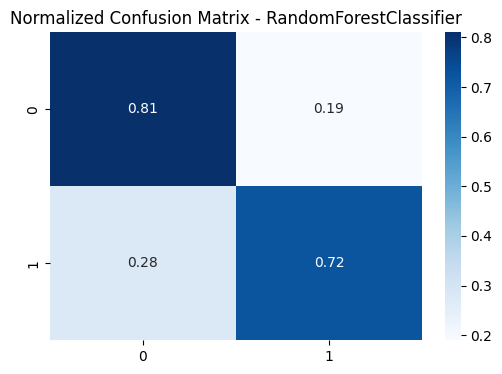

Classification Report:
              precision    recall  f1-score   support

           0    0.76613   0.81897   0.79167       116
           1    0.81579   0.76230   0.78814       122

    accuracy                        0.78992       238
   macro avg    0.79096   0.79063   0.78990       238
weighted avg    0.79159   0.78992   0.78986       238



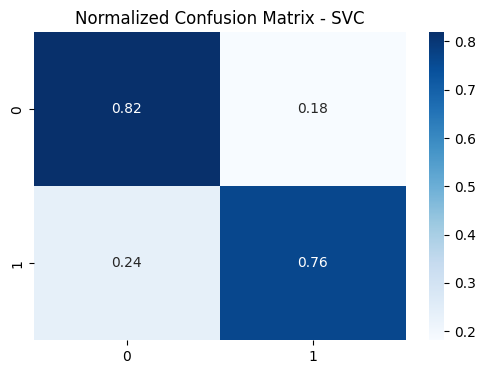

Classification Report:
              precision    recall  f1-score   support

           0    0.75439   0.74138   0.74783       116
           1    0.75806   0.77049   0.76423       122

    accuracy                        0.75630       238
   macro avg    0.75623   0.75594   0.75603       238
weighted avg    0.75627   0.75630   0.75623       238



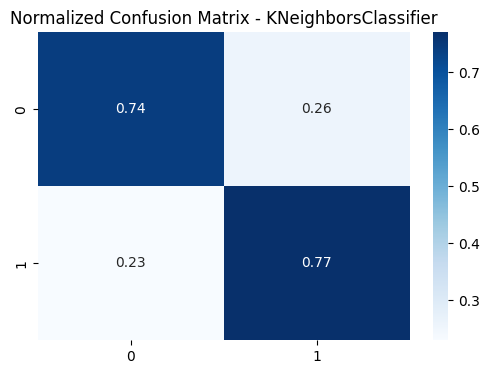

Classification Report:
              precision    recall  f1-score   support

           0    0.65563   0.85345   0.74157       116
           1    0.80460   0.57377   0.66986       122

    accuracy                        0.71008       238
   macro avg    0.73011   0.71361   0.70571       238
weighted avg    0.73199   0.71008   0.70481       238



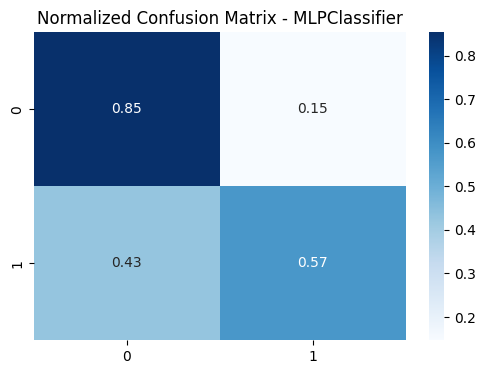

Classification Report:
              precision    recall  f1-score   support

           0    0.76190   0.82759   0.79339       116
           1    0.82143   0.75410   0.78632       122

    accuracy                        0.78992       238
   macro avg    0.79167   0.79084   0.78986       238
weighted avg    0.79242   0.78992   0.78977       238



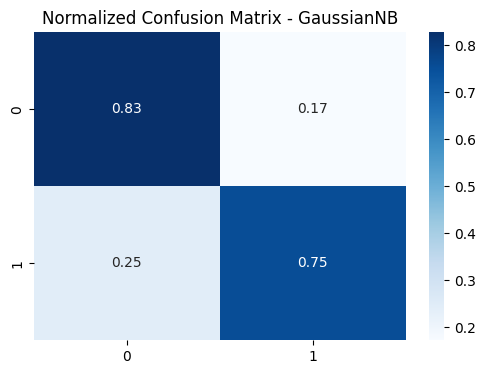

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=5):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Compute classification report
    report = classification_report(y_test, predictions, digits=digits)

    # Print formatted classification report
    print(f"Classification Report:\n{report}")

    # Compute confusion matrix
    confusion_matrix_data = confusion_matrix(y_test, predictions)

    # Normalize confusion matrix
    normalized_confusion_matrix = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    # Plot normalized confusion matrix as heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(normalized_confusion_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f"Normalized Confusion Matrix - {type(model).__name__}")
    plt.show()

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(logistic_model, X_train, y_train, X_test, y_test, digits=4)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test, digits=4)

# Random Forest
random_forest_model = RandomForestClassifier()
evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)

# Support Vector Machines (SVM)
svm_model = SVC()
evaluate_model(svm_model, X_train, y_train, X_test, y_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, y_train, X_test, y_test)

# Neural Networks
neural_network_model = MLPClassifier()
evaluate_model(neural_network_model, X_train, y_train, X_test, y_test)

# Naive Bayes
naive_bayes_model = GaussianNB()
evaluate_model(naive_bayes_model, X_train, y_train, X_test, y_test)